## Detección de raza de perros

https://textvqa.org/textocr/dataset/

https://github.com/bearpaw/clothing-co-parsing (prendas de vestir)

https://www.cityscapes-dataset.com/downloads/ (objetos en calles de ciudad)

## Ejemplo  de uso

Vamos a ver como podemos utilizar el modelo `Faster R-CNN` disponible en `torchvision` para generar detecciones. En primer lugar vamos a utilizar el mismo dataset que hemos usado en los vídeos anteriores, el dataset `VOC` (el modelo `Faster R-CNN` de `torchvision` está entrenado en el dataset `COCO`)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# mount it
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

path = "/content/data"
os.mkdir(path)

FileExistsError: ignored

In [ ]:
import shutil
shutil.copy("/content/drive/MyDrive/datasets/TextOCR/TextOCR_0.1_train.json", "/content/data/TextOCR_0.1_train.json")
shutil.copy("/content/drive/MyDrive/datasets/TextOCR/TextOCR_0.1_val.json", "/content/data/TextOCR_0.1_val.json")
shutil.copy("/content/drive/MyDrive/datasets/TextOCR/TextOCR_0.1_train.json", "/content/data/TextOCR_0.1_train.json")
shutil.copy("/content/drive/MyDrive/datasets/TextOCR/train_val_images.zip", "/content/data/train_val_images.zip")
shutil.copy("/content/drive/MyDrive/datasets/TextOCR/test_images.zip", "/content/data/test_images.zip")

In [ ]:
shutil.unpack_archive("/content/drive/MyDrive/datasets/TextOCR/train_val_images.zip", "/content/data")
shutil.unpack_archive("/content/drive/MyDrive/datasets/TextOCR/test_images.zip", "/content/data")

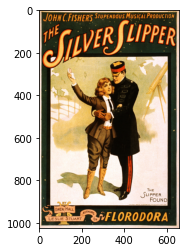

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('/content/data/train/00068a9d975dcc8a.jpg')

imgplot = plt.imshow(img)

In [ ]:
import torch
import torchvision 
from torchvision import datasets, transforms, models
from torch import optim as optim
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import matplotlib
import matplotlib.patches as patches
import glob
import xml.etree.ElementTree as ET
import albumentations as A
# from albumentations.pytorch.transforms import ToTensorV2

In [ ]:
import torch
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
import torchvision
import os
import pandas as pd
from skimage import io
from torch.utils.data import (
    Dataset,
    DataLoader,
)  # Gives easier dataset managment and creates mini batches


class TextOCRDataset(Dataset):
    def __init__(self, json_file, root_dir, transform=None):
        self.annotations = pd.read_json(json_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations["anns"]["id"].unique())

    def __getitem__(self, index):
      imagenId = ""
      img_path = ""
      y_labels = []
      if self.annotations["imgs"][index]["file_name"] != None:
        imagenId = anotaciones["imgs"][index]["id"]
        img_path = os.path.join(self.root_dir, str(anotaciones["imgs"][index]["file_name"]))  
      else:
        idImagen = self.annotations["anns"][index]["id"] 
        img_path = os.path.join(self.root_dir, str(idImagen + ".jpg"))
        y_labels = self.annotations["anns"][index]["utf8_string"] 
        
      image = io.imread(img_path)
      # y_label = torch.tensor(int(self.annotations["anns"][index]["utf8_string"]))
      # y_label = torch.tensor(int(self.annotations["imgToAnns"][index]["utf8_string"]))

      if self.transform:
        image = self.transform(image)

      return (image, y_labels)


In [ ]:
anotaciones = pd.read_json("/content/data/TextOCR_0.1_train.json")

AttributeError: ignored

In [ ]:
anotaciones

,info,imgs,anns,imgToAnns
a4ea732cd3d5948a,NaN,"{'id': 'a4ea732cd3d5948a', 'width': 840, 'heig...",NaN,"[a4ea732cd3d5948a_1, a4ea732cd3d5948a_2, a4ea7..."
4bf43a7b2a898044,NaN,"{'id': '4bf43a7b2a898044', 'width': 1024, 'hei...",NaN,"[4bf43a7b2a898044_1, 4bf43a7b2a898044_2, 4bf43..."
1b55b309b0f50d02,NaN,"{'id': '1b55b309b0f50d02', 'width': 1024, 'hei...",NaN,"[1b55b309b0f50d02_1, 1b55b309b0f50d02_2, 1b55b..."
00c359f294f7dcd9,NaN,"{'id': '00c359f294f7dcd9', 'width': 1024, 'hei...",NaN,"[00c359f294f7dcd9_1, 00c359f294f7dcd9_2, 00c35..."
04b5a37f762b0f51,NaN,"{'id': '04b5a37f762b0f51', 'width': 768, 'heig...",NaN,"[04b5a37f762b0f51_1, 04b5a37f762b0f51_2, 04b5a..."
...,...,...,...,...
0ebbecdc46b78d42_15,NaN,NaN,"{'id': '0ebbecdc46b78d42_15', 'image_id': '0eb...",NaN
a37e1fb026b80a6d_1,NaN,NaN,"{'id': 'a37e1fb026b80a6d_1', 'image_id': 'a37e...",NaN
a37e1fb026b80a6d_2,NaN,NaN,"{'id': 'a37e1fb026b80a6d_2', 'image_id': 'a37e...",NaN
a37e1fb026b80a6d_3,NaN,NaN,"{'id': 'a37e1fb026b80a6d_3', 'image_id': 'a37e...",NaN


In [ ]:
anotaciones["imgs"][0]

In [ ]:
anotaciones["anns"][100000]

In [ ]:
anotaciones["imgToAnns"][0][0]

In [ ]:
anotaciones["anns"]["a4ea732cd3d5948a_1"]

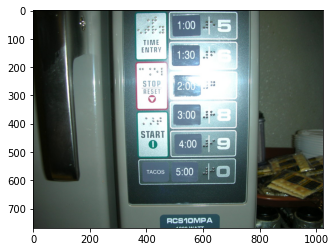

In [ ]:
img=mpimg.imread('/content/data/' + str(anotaciones["imgs"][1000]["file_name"]))

imgplot = plt.imshow(img)

In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Data
dataset = TextOCRDataset(
    json_file="/content/data/TextOCR_0.1_train.json",
    root_dir="/content/data/",
    transform=transforms.ToTensor(),
)



In [ ]:
# Dataset is actually a lot larger ~25k images, just took out 10 pictures
# to upload to Github. It's enough to understand the structure and scale
# if you got more images.
#train_set, test_set = torch.utils.data.random_split(dataset, [5, 5])

In [ ]:
len(dataset)

KeyError: ignored